# Aula 7 - Exercícios - Correlação e Regressão
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [73]:
# Importe a biblioteca pandas
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt 

### 7.1 Plote o heatmap da correlação das variáveis do dataframe formado pelo merge do dataset de morbidade com o dataset de gini.
#### O merge desses dois datasets for realizado no exercício 5.5
#### Defina um tamanho de figura 35x35, plote o heatmap com anotações e remova a barra de cores com o argumento cbar=False

,Município_x,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,...,Óbitos,Taxa_mortalidade,mes,ano,mes_ano,cod_ibge6,Município_y,1991,2000,2010
0,Alta Floresta D'Oeste,149.0,149,101282.26,77693.11,NaN,NaN,23589.15,NaN,NaN,...,8.0,5.37,Abr,2020,2020-04-01,110001,Alta Floresta D'Oeste,0.5983,0.5868,0.5893
1,Alta Floresta D'Oeste,86.0,86,42705.09,34433.05,NaN,NaN,8272.04,NaN,NaN,...,2.0,2.33,Jun,2020,2020-06-01,110001,Alta Floresta D'Oeste,0.5983,0.5868,0.5893
2,Alta Floresta D'Oeste,133.0,133,119966.00,91848.09,NaN,NaN,28117.91,NaN,NaN,...,2.0,1.50,Mai,2020,2020-05-01,110001,Alta Floresta D'Oeste,0.5983,0.5868,0.5893
3,Alta Floresta D'Oeste,197.0,197,91431.64,71821.68,NaN,NaN,19609.96,NaN,NaN,...,3.0,1.52,Mar,2020,2020-03-01,110001,Alta Floresta D'Oeste,0.5983,0.5868,0.5893
4,Alta Floresta D'Oeste,197.0,197,93474.87,76607.12,NaN,NaN,16867.75,NaN,NaN,...,2.0,1.02,Fev,2020,2020-02-01,110001,Alta Floresta D'Oeste,0.5983,0.5868,0.5893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33315,Carrapateira,5.0,5,15663.80,13059.50,NaN,NaN,2604.30,NaN,NaN,...,NaN,NaN,Jan,2020,2020-01-01,250410,Carrapateira,0.6123,0.4895,0.4764
33316,Aroeiras do Itaim,1.0,1,1266.50,989.83,NaN,NaN,276.67,NaN,NaN,...,NaN,NaN,Mai,2020,2020-05-01,220095,Aroeiras do Itaim,NaN,NaN,0.4855
33317,Aroeiras do Itaim,9.0,9,4950.27,3647.77,NaN,NaN,1302.50,NaN,NaN,...,NaN,NaN,Mar,2020,2020-03-01,220095,Aroeiras do Itaim,NaN,NaN,0.4855
33318,Aroeiras do Itaim,7.0,7,3492.63,2356.03,NaN,NaN,1136.60,NaN,NaN,...,NaN,NaN,Fev,2020,2020-02-01,220095,Aroeiras do Itaim,NaN,NaN,0.4855


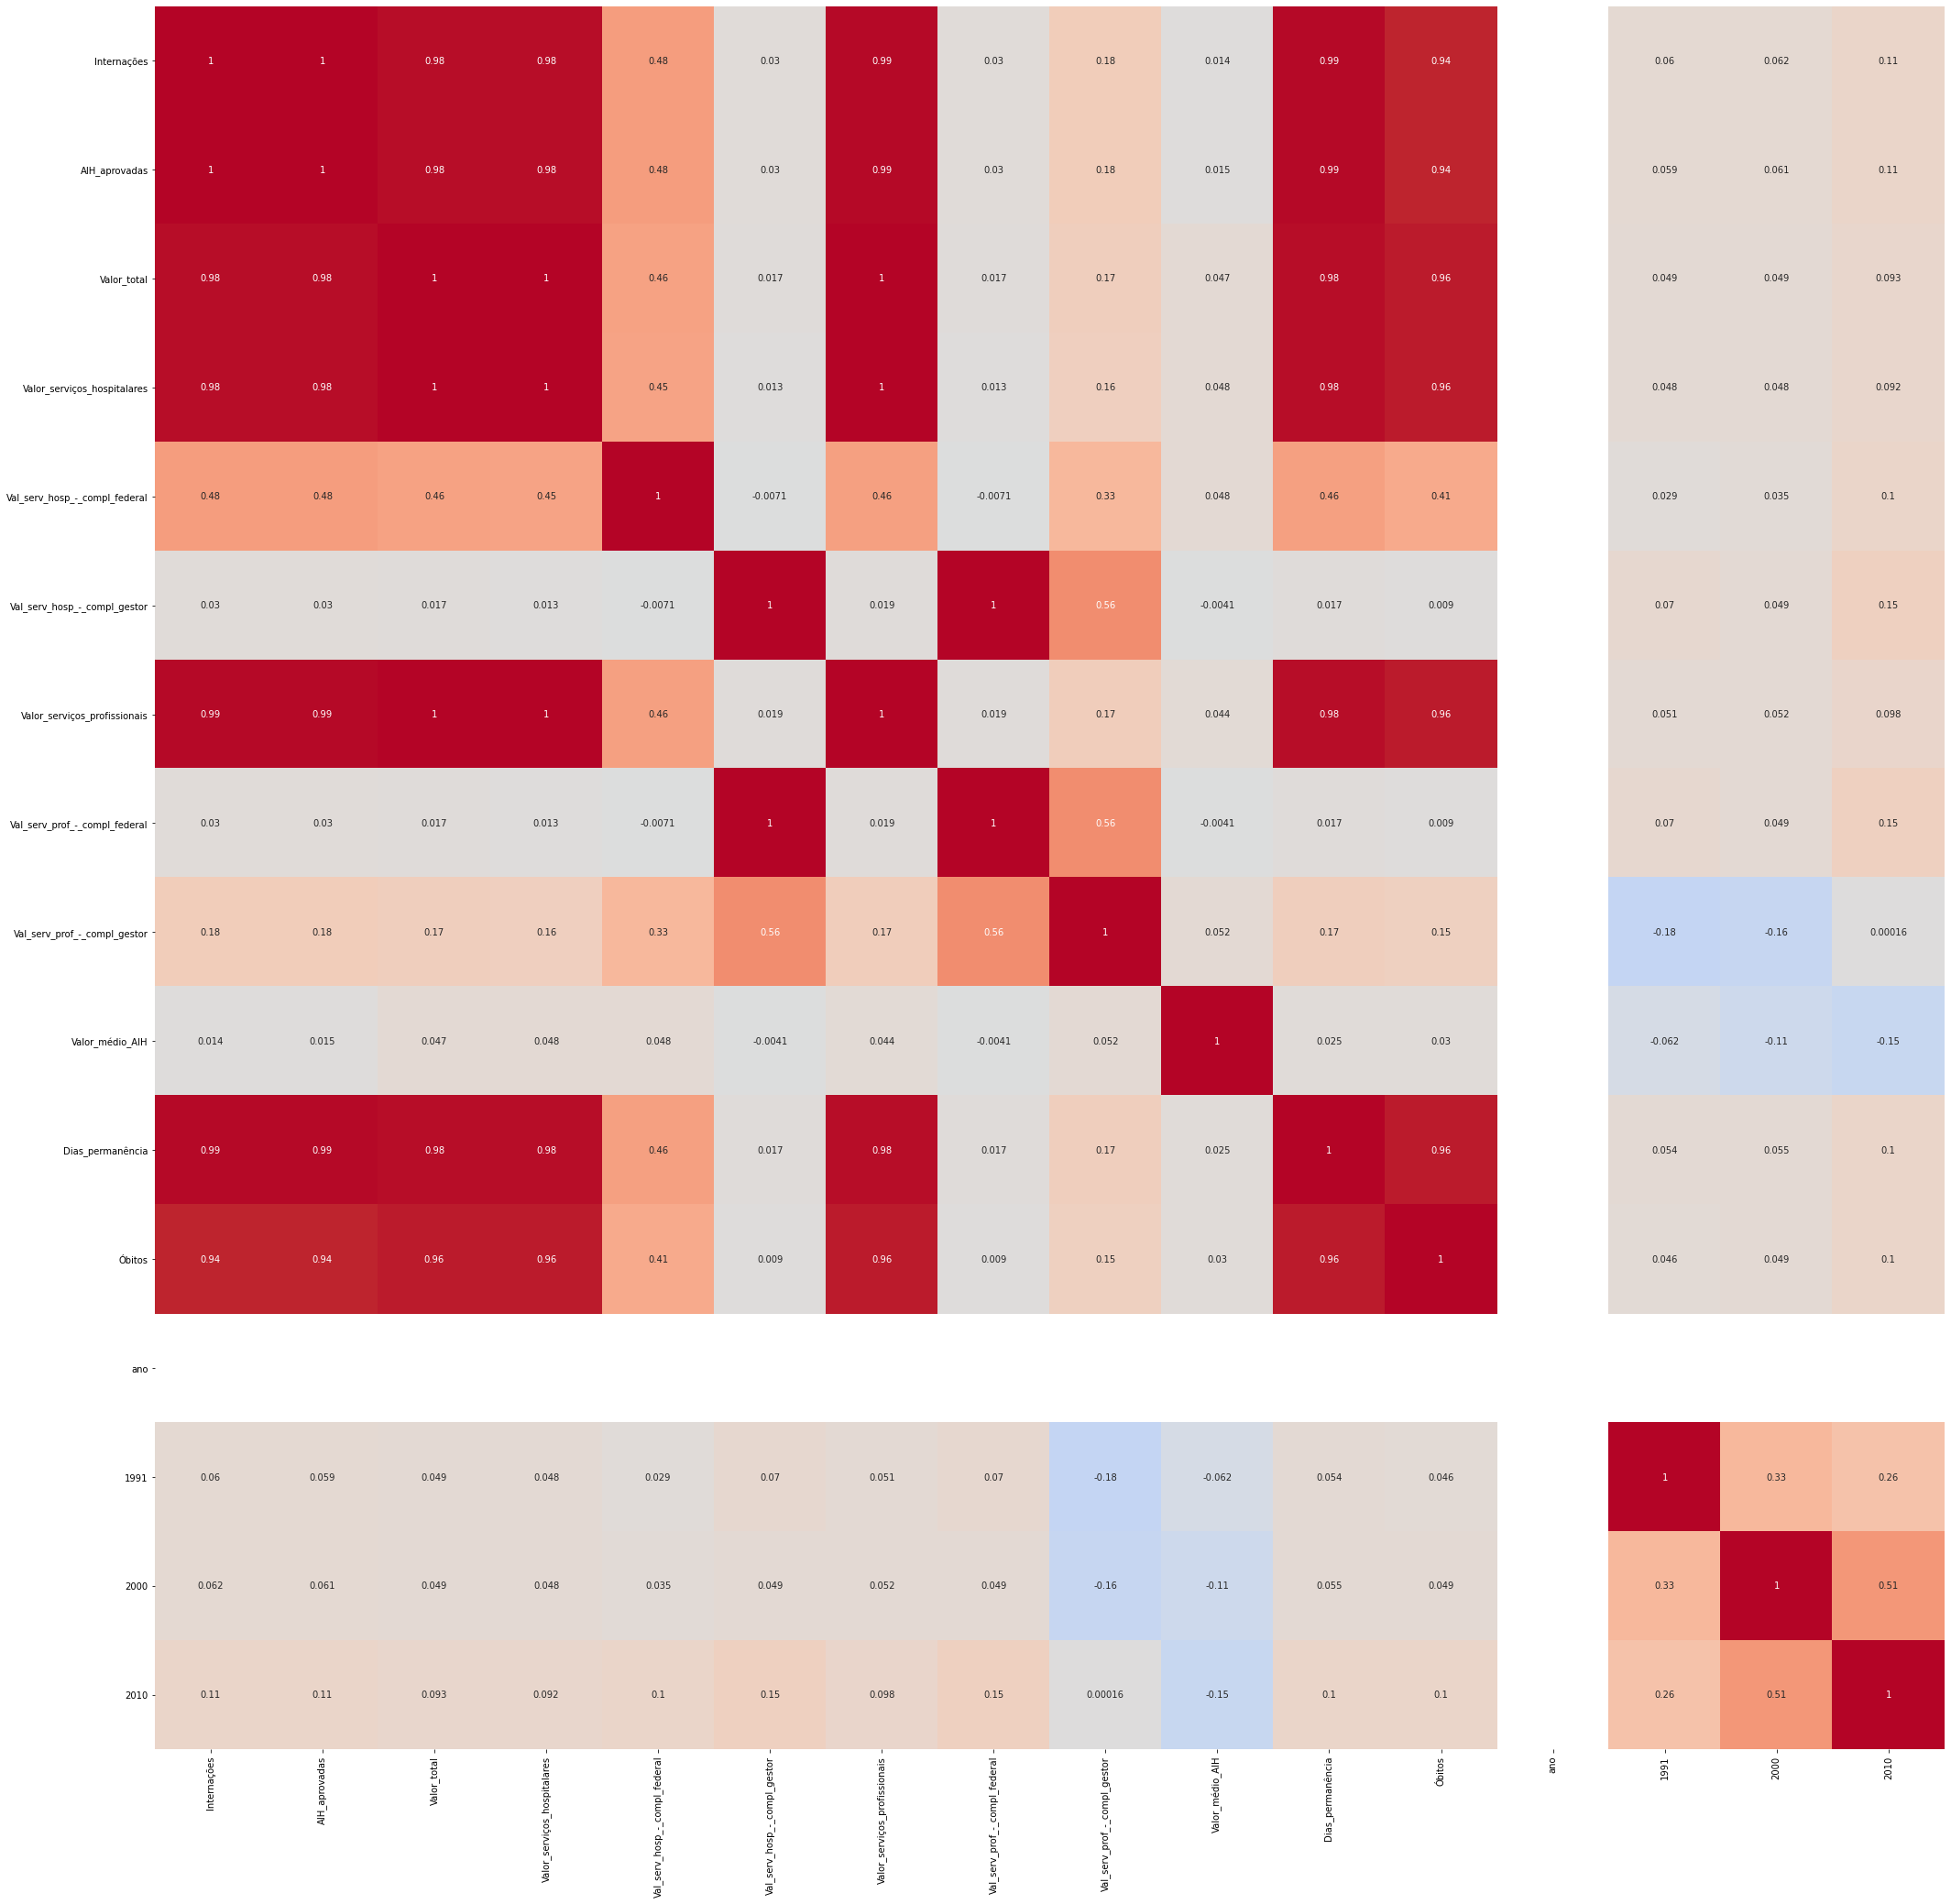

In [74]:
path_gini = '../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'
df = pd.read_csv(path_gini,encoding="utf-8",sep=";",decimal=",",engine="python",header=2,skipfooter=2,na_values=["..."])
df["cod_ibge6"] = df['Município'].apply(lambda x : x[0:6])
df["Município"] = df['Município'].apply(lambda x : x[7:])
path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'
df_morbidade = pd.read_csv(path_morbidade,encoding="utf-8",sep=";",decimal=",",engine="python",header=0,na_values=["-",""], dtype={"cod_ibge6":str})
df_morbidade
merge  = df_morbidade.merge(df,  on = ['cod_ibge6'])
# g = sns.pairplot(merge, vars=["Internações", "Óbitos", '2010'])
merge.corr()
plt.figure(figsize=(35,35))
sns.heatmap(merge.corr(), annot = True, vmin=-1, vmax=1, center=0, cmap='coolwarm',  cbar=False)
merge
# YOUR CODE HERE
# raise NotImplementedError()

### 7.2 Plote o heatmap da correlação das variáveis do dataframe formado pelo merge do dataset do IDEB com o dataset de gini.
#### Plote o heatmap com anotações.
#### Colete o valor do IDEB de 2017 da coluna O da tabela do IDEB abaixo. O pandas lê essa coluna com o nome IDEB12_17.
#### path_ideb = '../../curso_ciencia_dados2020/data/originais/ideb/ideb_municipios2017.xlsx'
#### Dica: Construa uma coluna com o código do ibge do município (de 6 caracteres) e faça um slice das colunas do dataframe do IDEB de modo a selecionar apenas as colunas mostradas a seguir:

|    |   cod_ibge6 | NO_MUNICIPIO          |   IDEB12_17 |
|---:|------------:|:----------------------|------------:|
|  1 |      110001 | Alta Floresta D'Oeste |         3.9 |
|  2 |      110002 | Ariquemes             |         3.8 |
|  5 |      110003 | Cabixi                |         3.7 |
|  7 |      110004 | Cacoal                |         3.9 |
|  9 |      110005 | Cerejeiras            |         3.8 |


<AxesSubplot:>

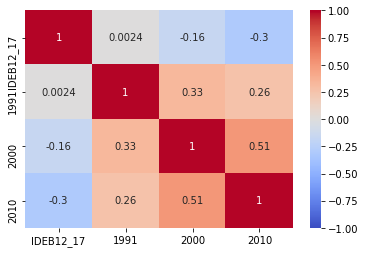

In [98]:
# YOUR CODE HERE
# raise NotImplementedError()
path_ideb = '../../curso_ciencia_dados2020/data/originais/ideb/ideb_municipios2017.xlsx'
df_ideb = pd.read_excel(path_ideb,skiprows=9, skipfooter=3, na_values=["-",""] )
df_ideb["cod_ibge6"] = df_ideb['COD_MUN'].apply(lambda x : x//10).astype(str)
df_ideb = df_ideb.loc[df_ideb['REDE'] == 'Pública']
df_ideb = df_ideb[["cod_ibge6", 'NO_MUNICIPIO',"IDEB12_17"]]
df_ideb["IDEB12_17"] = df_ideb["IDEB12_17"].astype(float)
merge  = df_ideb.merge(df,  on = ['cod_ibge6'])
merge.corr()
sns.heatmap(merge.corr(), annot = True, vmin=-1, vmax=1, center=0, cmap='coolwarm')

### 7.3 Considerando o resultado do merge do exercício 7.2 (que deve conter as colunas cod_ibge6, NO_MUNICIPIO,	IDEB12_17,	Município, 1991, 2000 e 2010) faça uma análise de regressão linear para estimar o valor do IDEB dos municípios baseado nos outros atributos disponíveis nesta agregação.
#### Faça a regressão linear com a biblioteca statsmodel e imprima o sumário do modelo.
#### Comente o potencial explicativo do modelo.
#### Dica: não esqueça de adicionar a constante à formula da regressão.


In [97]:
# # YOUR CODE HERE
# raise NotImplementedError()

import statsmodels.api as sm

# Carrege a coluna RM na variavel X
X = merge[["1991","2000","2010"]].fillna(method='ffill')
# Carrege a coluna RM MEDV variavel X
y = merge["IDEB12_17"]
## adicione o valor de interceptação do eixo y, o b da equação y = ax + b
X = sm.add_constant(X) 

# Primeiro a variável dependente, depois a variável indepedente.
# O metodo OLS da biblioteca statsmodel não adiciona a constante b da equação y = ax + b
# Você precisa explicitamente montar esta equação.
# Vamos fazer a regressão inicialmente sem a constante
model = sm.OLS(y, X).fit()

# Mostra o resumo das estatisticas
model.summary()
# merge


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              IDEB12_17   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 14 Sep 2020   Prob (F-statistic):                nan
Time:                        00:00:22   Log-Likelihood:                    nan
No. Observations:               11256   AIC:                               nan
Df Residuals:                   11252   BIC:                               nan
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
1991              nan        nan        nan        nan         nan         nan
2000              nan        nan        nan        nan         nan         nan
2010              nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         29.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# Calcule as predições guardando o resultado na variavel predictions
predictions = model.predict(X)

In [95]:
predictions[:5]

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

### 7.4 Considerando o dataset Duncan (indicado a seguir) faça uma análise de regressão linear para estimar o valor da variavel prestige baseado nos valores dos atributos income e education.
#### Faça a regressão linear com a biblioteca statsmodel e imprima o sumário do modelo.
#### Comente o potencial explicativo do modelo.
#### Dica: não esqueça de adicionar a constante à formula da regressão.

In [99]:
import statsmodels.api as sm
data_prestige = sm.datasets.get_rdataset("Duncan", "carData")
print(data_prestige.__doc__)

====== ===============
Duncan R Documentation
====== ===============

Duncan's Occupational Prestige Data
-----------------------------------

Description
~~~~~~~~~~~

The ``Duncan`` data frame has 45 rows and 4 columns. Data on the
prestige and other characteristics of 45 U. S. occupations in 1950.

Usage
~~~~~

::

   Duncan

Format
~~~~~~

This data frame contains the following columns:

type
   Type of occupation. A factor with the following levels: ``prof``,
   professional and managerial; ``wc``, white-collar; ``bc``,
   blue-collar.

income
   Percentage of occupational incumbents in the 1950 US Census who
   earned $3,500 or more per year (about $36,000 in 2017 US dollars).

education
   Percentage of occupational incumbents in 1950 who were high school
   graduates (which, were we cynical, we would say is roughly equivalent
   to a PhD in 2017)

prestige
   Percentage of respondents in a social survey who rated the occupation
   as “good” or better in prestige

Source
~~~~~~



In [108]:
# YOUR CODE HERE
# raise NotImplementedError()
# Define o dataframe que vai conter as variaveis independentes
df = pd.DataFrame(data_prestige.data)
df
# Define o dataframe que vai conter a variavel dependente
target = pd.DataFrame(data_prestige.data, columns=["prestige"])
target

,prestige
accountant,82
pilot,83
architect,90
author,76
chemist,90
minister,87
professor,93
dentist,90
reporter,52
engineer,88


In [115]:
import statsmodels.api as sm

# Carrege a coluna RM na variavel X
X = df[["income","education"]]
# Carrege a coluna RM MEDV variavel X
y = df["prestige"]
## adicione o valor de interceptação do eixo y, o b da equação y = ax + b
X = sm.add_constant(X) 

# Primeiro a variável dependente, depois a variável indepedente.
# O metodo OLS da biblioteca statsmodel não adiciona a constante b da equação y = ax + b
# Você precisa explicitamente montar esta equação.
# Vamos fazer a regressão inicialmente sem a constante
model = sm.OLS(y, X).fit()

# Mostra o resumo das estatisticas
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           8.65e-17
Time:                        00:31:15   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0647      4.272     -1.420      0.163     -14.686       2.556
income         0.5987      0.120      5.003      0.000       0.357       0.840
education      0.5458      0.098      5.555      0.000       0.348       0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
# Calcule as predições guardando o resultado na variavel predictions
predictions = model.predict(X)
# Imprima as 5 primeiras predições
predictions[:5]

accountant    77.998488
pilot         78.527477
architect     89.057018
author        75.990694
chemist       79.195954
dtype: float64